# Praktische Umsetzung 
## Sport: Außergewöhnliche Fußballspieler 
### Definition der Aufgabe
Es handelt sich darum, ein Script, zu erstellen, welches Hinweise auf außergewöhnliche Spieler liefert. Als Ausgangbasis wird ein Cluster-Algorithmus genutzt. Erwartet wird eine Liste der außergewöhnlichen Spieler.


### Datenbeschaffung und -vorverarbeitung
- [x] Herunterladen von player-data sets aus [kaggle](https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset/data)
- [x] Einlesen der Daten: es wird die Pandas Bibliothek benutzt, um die csv Datei einzulesen.

In [4]:
# notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.mixture import BayesianGaussianMixture 

In [5]:
player_data = pd.read_csv("player_stats.csv", encoding="utf-8", encoding_errors="replace")
player_data

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Man�,Senegal,174,69,31,FC Bayern M�nchen,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [6]:
player_data.tail(10)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5672,Sergio León,Spain,178,73,34,R. Valladolid CF,73,75,NaN,21,...,75,64,74,75,13,6,8,11,10,$2.700.000
5673,Rodri,Spain,191,82,27,Manchester City,85,78,NaN,78,...,65,61,46,59,14,10,10,7,8,$77.000.000
5674,Mert Çetin,Turkey,189,90,26,Adana Demirspor,58,56,NaN,71,...,48,39,42,37,12,5,10,12,10,$1.500.000
5675,Kylian Mbapp�,France,182,73,24,Paris SG,91,93,NaN,32,...,80,69,84,83,11,13,5,7,6,$153.500.000
5676,Karim Benzema,France,185,81,35,Real Madrid,91,87,NaN,18,...,82,73,84,88,5,13,11,5,7,$64.000.000
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Man�,Senegal,174,69,31,FC Bayern M�nchen,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000
5681,Zlatan Ibrahimovi?,Sweden,195,102,41,Milan,85,75,NaN,24,...,79,74,80,87,9,13,15,10,12,$10.500.000


Wir können feststellen, dass einige Zeichen nicht von `utf-8` dekodiert werden können. Es sind nämlich die Zeilen **5675**, **5678**. Diese konnten nur mit dem Einbezug des Arguments `encoding_errors="replace"` angezeigt werden. Nach einer manuellen Bereinigung konnte die Datei ohne dieses Argument richtig dekodiert werden.

In [8]:
player_data_cleaned = pd.read_csv("player_stats_cleaned.csv", encoding="utf-8")
player_data_cleaned.tail(10)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5672,Sergio León,Spain,178,73,34,R. Valladolid CF,73,75,NaN,21,...,75,64,74,75,13,6,8,11,10,$2.700.000
5673,Rodri,Spain,191,82,27,Manchester City,85,78,NaN,78,...,65,61,46,59,14,10,10,7,8,$77.000.000
5674,Mert Çetin,Turkey,189,90,26,Adana Demirspor,58,56,NaN,71,...,48,39,42,37,12,5,10,12,10,$1.500.000
5675,Kylian Mbappé,France,182,73,24,Paris SG,91,93,NaN,32,...,80,69,84,83,11,13,5,7,6,$153.500.000
5676,Karim Benzema,France,185,81,35,Real Madrid,91,87,NaN,18,...,82,73,84,88,5,13,11,5,7,$64.000.000
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000
5681,Zlatan Ibrahimović,Sweden,195,102,41,Milan,85,75,NaN,24,...,79,74,80,87,9,13,15,10,12,$10.500.000


- [x] Jetzt sollten die Duplikate aus dem Datensatz entfernt werden. Davor sollten die Leerzeichen aus der Spalte `club` gelöscht werden.

- [x] Es wird jetzt nach Duplizierung gesucht.

In [11]:
player_data_cleaned[player_data_cleaned.duplicated(["player", "height", "weight", "age", "club"])]

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
158,Maxime Crépeau,Canada,180,88,29,LAFC,45,19,NaN,17,...,16,14,23,19,70,72,70,70,75,$2.200.000
159,Stefan Thesker,Germany,190,84,32,Holstein Kiel,55,45,NaN,64,...,33,31,42,40,14,13,7,10,12,$700.00
160,Cameron John,England,181,78,24,Rochdale,55,53,NaN,57,...,34,25,32,28,8,13,9,7,8,$350.00


- [x] Es werden an dieser Stelle die Duplikate aus dem Datensatz gelöscht.

In [13]:
player_data_cleaned = player_data_cleaned.drop_duplicates(["player", "height", "weight", "age", "club"])
player_data_cleaned

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


Da die Spalte "marking" null Werte enthält, wird sie entfernt.
  - Marking (Player's marking skill.)

In [15]:
player_data_cleaned_reduced = player_data_cleaned.drop(columns=["marking"])
player_data_cleaned_reduced

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,41,43,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,38,42,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,29,32,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,24,32,...,79,75,90,85,14,7,11,15,11,$31.000.000


### Erste Datenanalyse
An dieser Stelle wird versucht die ältesten Spieler mit Namen und Alter zu identifizieren.

In [17]:
max_age = player_data_cleaned_reduced["age"].max()
oldest_player = player_data_cleaned_reduced.loc[player_data_cleaned_reduced["age"] == max_age]
oldest_player

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
1574,Antolín Alcáraz,Paraguay,187,78,41,Olimpia,61,57,73,74,...,32,35,48,35,16,8,11,10,11,$325.00
3930,Pepe Reina,Spain,188,92,41,Villarreal CF,23,10,24,22,...,11,11,24,11,79,75,77,79,76,$275.00
4422,Diego López,Spain,196,89,41,Rayo Vallecano,25,11,14,13,...,10,11,21,14,80,76,78,68,76,$450.00
5409,Enrique Bologna,Argentina,189,87,41,Defensa,32,22,17,22,...,16,18,25,10,70,73,66,71,73,$50.00
5681,Zlatan Ibrahimović,Sweden,195,102,41,Milan,85,75,24,37,...,79,74,80,87,9,13,15,10,12,$10.500.000


### Identifikation von Cluster
Es geht darum zu wissen, wie viel Cluster es gibt.
Aus diesem Datensatz sollten 4 Cluster gebildet werden, um das Ergebnis zu erreichen. Diese sind unter anderem: Stürmer, Mittelfeld-Spieler, Verteidiger und Torwarte.
Dafür ist die Anwendung von einem Algorithmus ganz hilfreich, nämlich dem Bayesian Gaussian Mixture Algorithmus.

 Damit der Algorithmus einwandfrei funktioniert, müssen nur Zahlen betrachtet werden. Da es aber im Datensatz string Werte gibt, sollte der Datensatz ohne dies analysiert werden.

In [20]:
numeric_player = player_data_cleaned_reduced.select_dtypes(include = "number")
numeric_player

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,192,84,22,55,43,68,73,72,68,30,...,31,32,34,41,33,10,11,6,7,9
1,181,80,31,69,70,56,58,62,70,69,...,68,65,62,48,46,12,15,14,8,14
2,193,84,29,25,12,13,16,27,65,17,...,20,20,15,26,16,64,74,65,68,74
3,187,86,33,46,48,66,69,71,64,48,...,33,25,13,22,19,10,10,8,14,9
4,191,80,23,14,8,14,16,28,50,10,...,6,9,10,16,5,61,59,62,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,175,71,31,86,88,41,43,63,92,91,...,84,84,69,86,83,11,14,14,9,14
5678,174,69,31,86,88,38,42,75,91,90,...,78,77,64,75,75,7,10,10,15,14
5679,175,68,31,94,95,29,32,63,88,86,...,81,88,87,91,86,15,9,9,15,11
5680,187,83,38,87,81,24,32,62,90,93,...,88,79,75,90,85,14,7,11,15,11


#### Bayesian Gaussian Algorithmus

An dieser Stelle soll aus dem Datensatz Cluster gebildet werden. Für diesen Zweck wird der Bayesian Gaussian Algorithmus angesetzt, weil dies eine einfache Interpretation und eine bessere Genauigkeit bietet.

Eine Normalisierung ist hier wichtig, um die Werte zwischen 0 und 1 zu behalten.

In [155]:
X = normalize(numeric_player)
X

array([[0.5537581 , 0.24226917, 0.06345145, ..., 0.01730494, 0.0201891 ,
        0.02595741],
       [0.46016073, 0.20338596, 0.07881206, ..., 0.03559254, 0.0203386 ,
        0.03559254],
       [0.59721133, 0.25992617, 0.08973642, ..., 0.20113335, 0.21041643,
        0.22898258],
       ...,
       [0.37960776, 0.14750473, 0.0672448 , ..., 0.01952268, 0.03253781,
        0.02386106],
       [0.40318957, 0.1789558 , 0.08193157, ..., 0.02371703, 0.03234141,
        0.02371703],
       [0.4358927 , 0.22800541, 0.09164923, ..., 0.03353021, 0.02235347,
        0.02682417]])

**Einsatz von dem Bayesian Gaussian Algorithmus**

Ein erster Versuch wird hier durchgeführt, um die Anzahl von Cluster zu schätzen.
Aus dem Datensatz können 4 Cluster gebildet werden. Aber das ist noch eine willkürliche Hypothese. Deswegen ist eine Bestätigung dieser Hypothese wichtig. Indem man eine höhere Zahl von Cluster eingibt(`n_components=10`), kann man mithilfe des Ergebnis die genaue Anzahl von Cluster bestimmen.

In [182]:
BGM_Algo = BayesianGaussianMixture(mean_precision_prior=1, n_components = 10, n_init=2, 
                                    random_state=12, weight_concentration_prior=0.1)
BGM_Algo.fit(X)

BayesianGaussianMixture(mean_precision_prior=1, n_components=10, n_init=2,
                        random_state=12, weight_concentration_prior=0.1)

In [184]:
BGM_Algo.weights_

array([0.07823527, 0.06137938, 0.09279051, 0.17168339, 0.09183318,
       0.03574372, 0.15146688, 0.13456778, 0.04901704, 0.13328285])

In [186]:
np.round(BGM_Algo.weights_, 2)

array([0.08, 0.06, 0.09, 0.17, 0.09, 0.04, 0.15, 0.13, 0.05, 0.13])

Aus diesem Ergebnis können vier sinnvolle Gruppen gebildet werden. **Es sind die Cluster mit einem Wert größer oder gleich 0.1**

Es wird jetzt der Datensatz erneut mit der genauen Anzahl von Cluster trainiert.

In [211]:
BGM_Algo1 = BayesianGaussianMixture(mean_precision_prior=1, n_components = 4, n_init=2, 
                                    random_state=12, weight_concentration_prior=0.1)
BGM_Algo1.fit(X)

BayesianGaussianMixture(mean_precision_prior=1, n_components=4, n_init=2,
                        random_state=12, weight_concentration_prior=0.1)

In [205]:
np.round(BGM_Algo1.weights_, 2)

array([0.34, 0.11, 0.28, 0.28])

In [207]:
y_pred = BGM_Algo1.predict(X)

**Grafische Darstellung von Cluster**

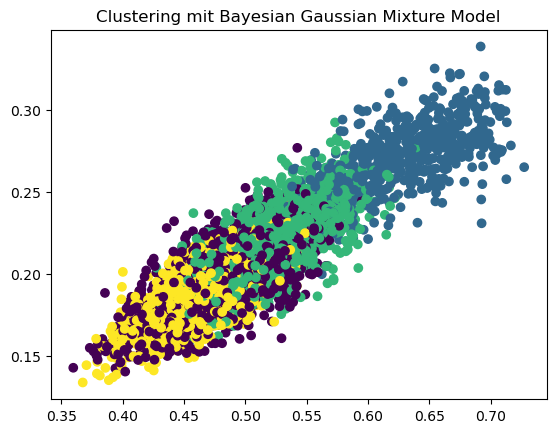

In [209]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.title("Clustering mit Bayesian Gaussian Mixture Model")
plt.show()

Mit dieser Analyse lässt sich bestätigen, dass vier sinnvolle Gruppen aus dem Datensatz gebildet werden können. Diesen Gruppen können folgenden Namen gegeben werden: 
- Stürmer
- Mittelfeld-Spieler
- Verteidiger
- Torwarte

An dieser Stelle wird eine Korrelationsmatrix angewendet, um zu identifizieren, welche Attribute einer Gruppe gehören. Sozusagen die Attribute, die miteinander korrelieren.

### Identifikation von der Korrelation zwischen Attributen
#### Korrelationsmatrix

<Axes: >

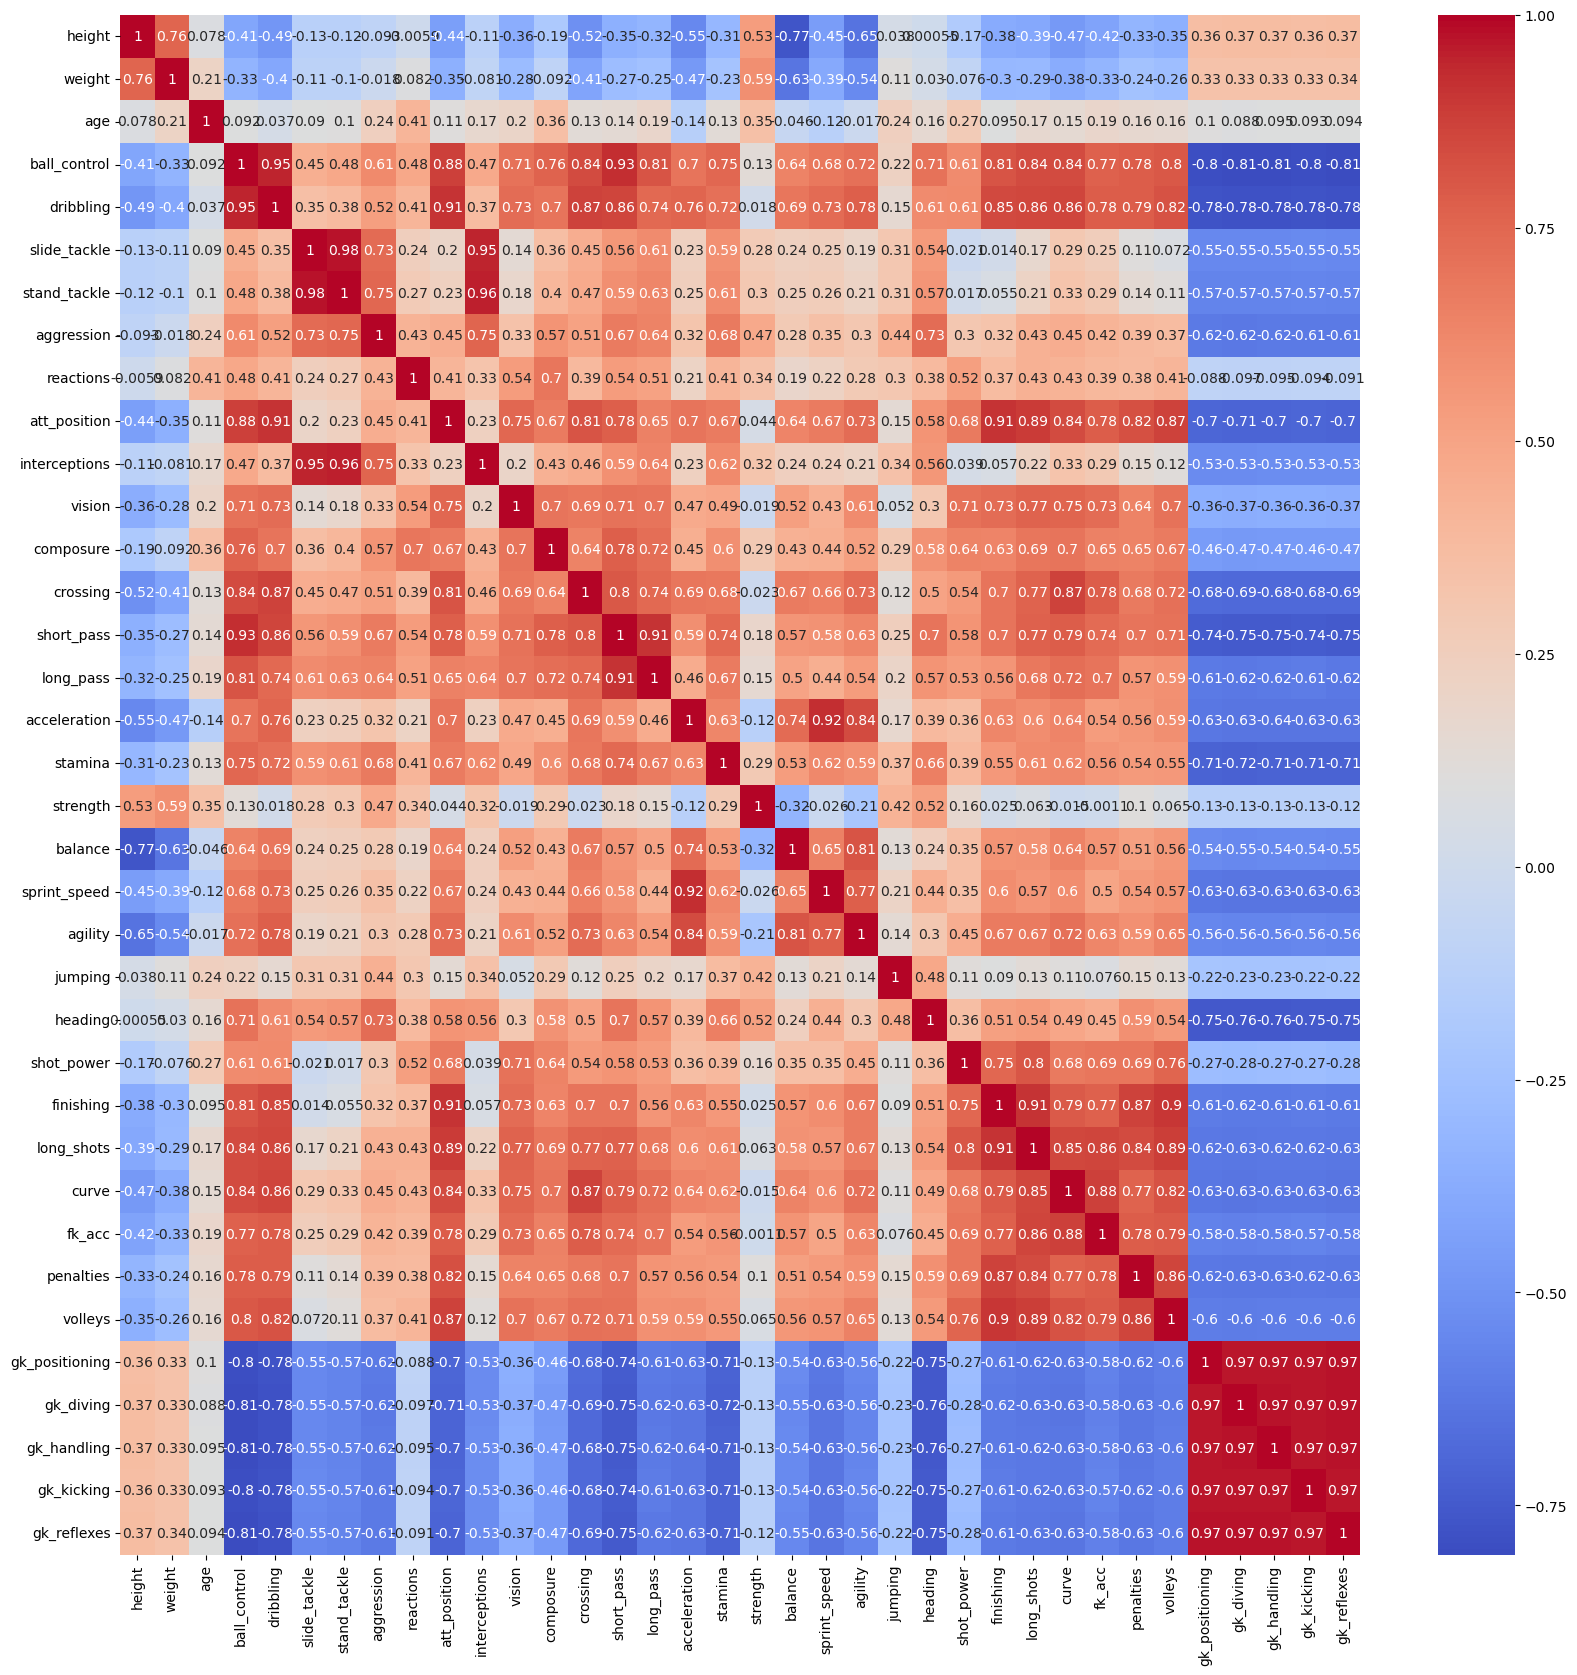

In [38]:
correlation_matrix = numeric_player.corr()
fig, ax = plt.subplots(figsize = (20, 20))
sn.heatmap(correlation_matrix, cmap = "coolwarm", annot=True, ax=ax)

##### **Eingränzung**
Für eine bessere lesbarkeit müssen die Felder sichtbar sein, die den Korrelationskoeffizient von mindestens 0.7 haben.

<Axes: >

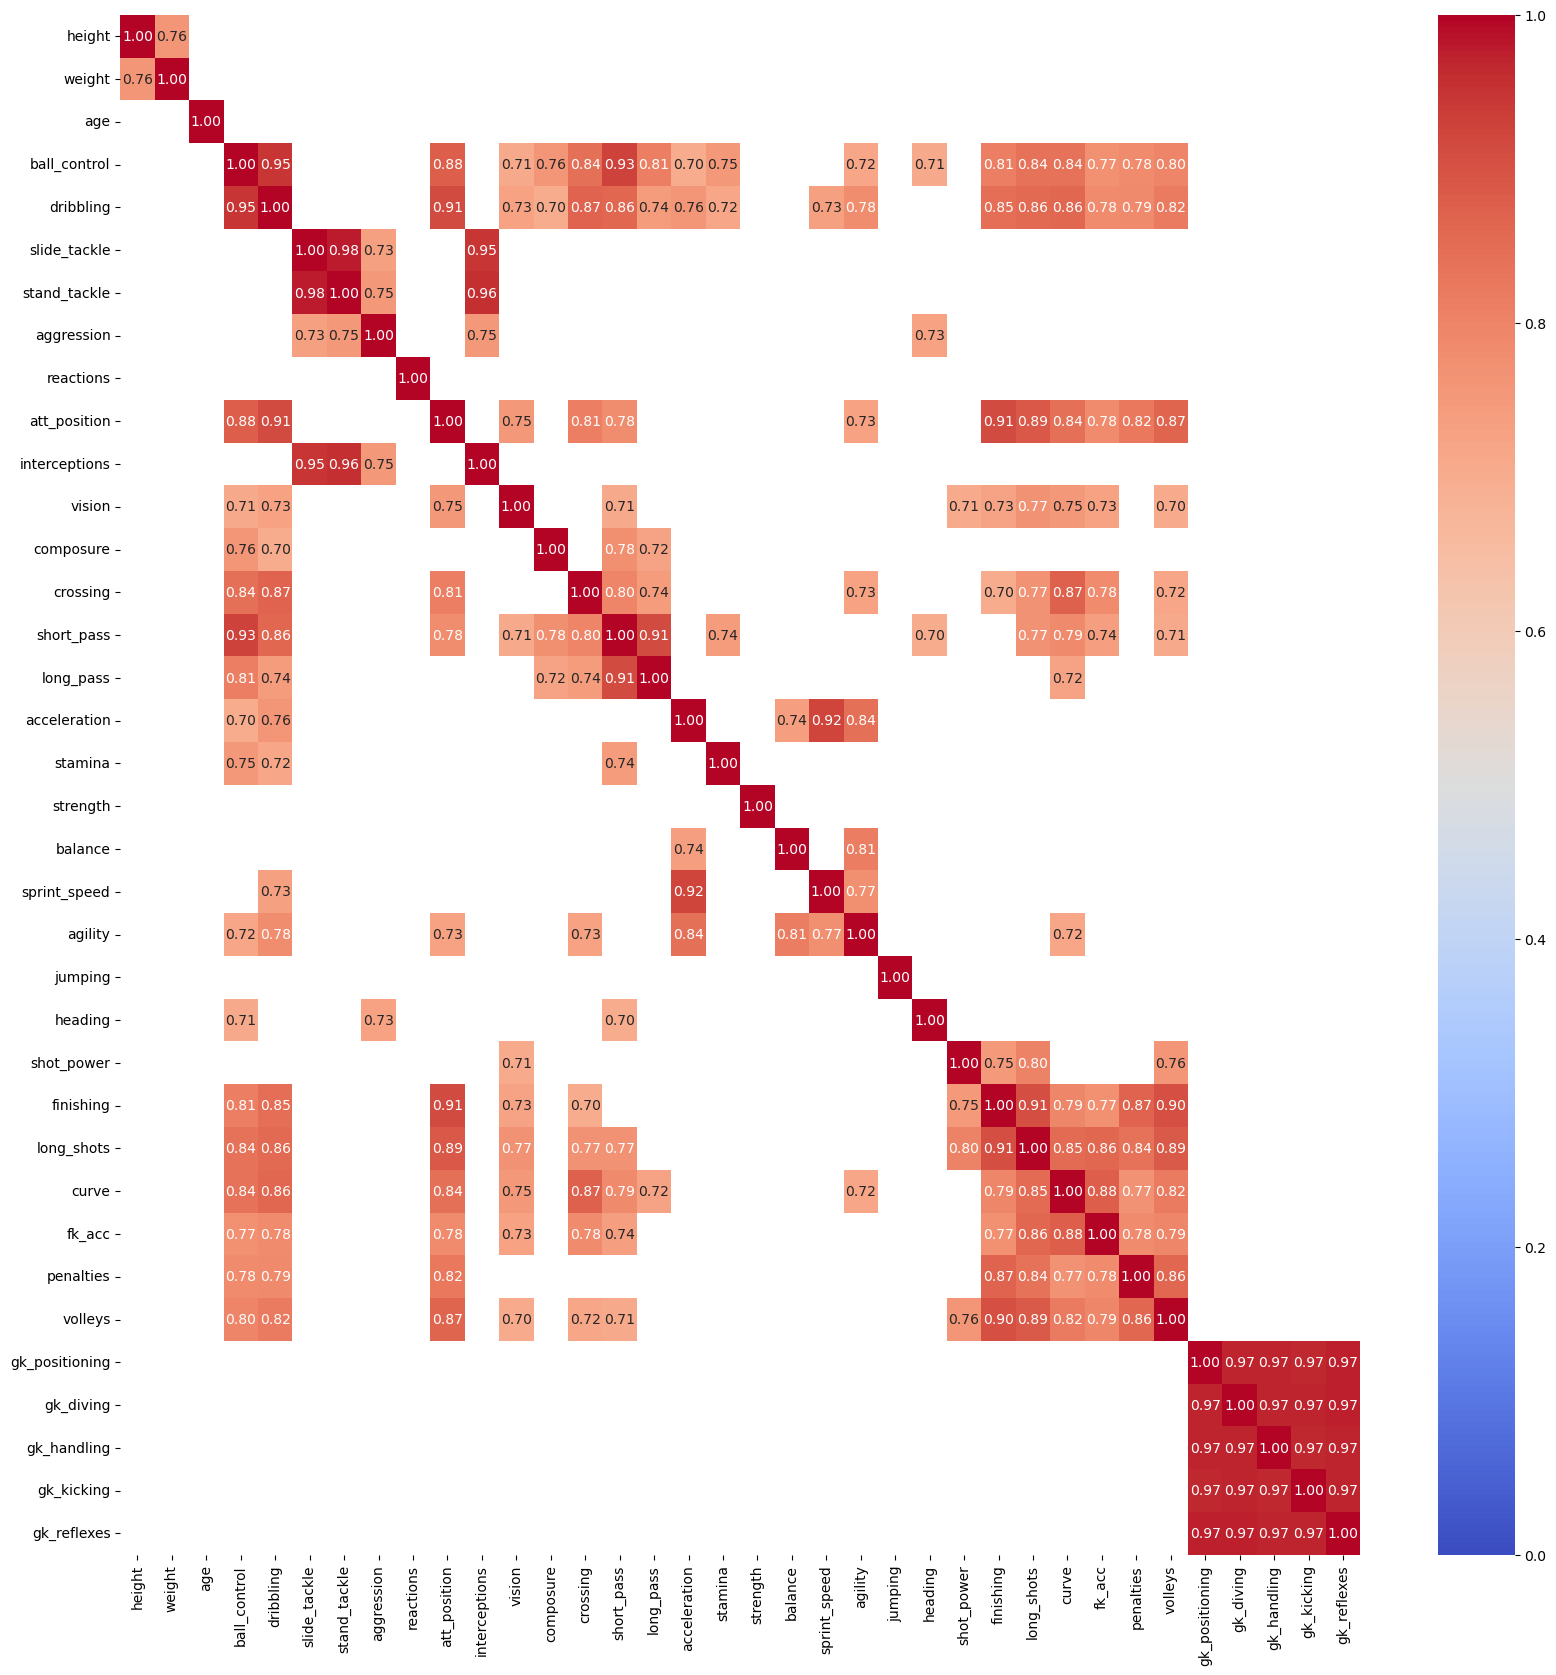

In [40]:
mask = correlation_matrix < 0.7
fig, ax = plt.subplots(figsize = (20, 20))
sn.heatmap(
    correlation_matrix,
    mask = mask, 
    cmap = "coolwarm", 
    annot=True,
    fmt=".2f",
    vmin=0.0,
    vmax=1.0,
    ax=ax)

Man kann dann sinnvolle Attribute einer Gruppe zuweisen;
- **Stürmer** = dribbling, att_positions, composure, acceleration, sprint_speed, heading, shot_power, finishing, long_shots.
- **Mittelfeld-Spieler** = ball_controll, dribbling, vision, crossing, curve, fk_acc (free kik accuracity), penalties, volleys, stamina
- **Verteidiger** = slide_tackle, stand_tackle, aggression, interceptions, strength, heading, reaction, composure
- **Torwart** = gk_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, reaction, composure, jumping

### Analyse

#### Korrelationsanalyse von der Stürmer-Gruppe

In [44]:
attacker = player_data_cleaned_reduced.loc[:,["player", "dribbling", "att_position", "composure", "acceleration", "sprint_speed", "agility", "shot_power", "finishing", "long_shots", "fk_acc"]]
attacker

,player,dribbling,att_position,composure,acceleration,sprint_speed,agility,shot_power,finishing,long_shots,fk_acc
0,Cristian Castro Devenish,43,30,50,41,52,43,54,30,31,34
1,Silaldo Taffarel,70,69,54,64,67,65,60,64,68,62
2,Thomas Dähne,12,17,48,46,48,36,51,14,20,15
3,Michael Sollbauer,48,48,70,35,63,57,32,24,33,13
4,Diego Segovia,8,10,34,38,31,34,48,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,88,91,90,89,89,89,82,92,84,69
5678,Sadio Mané,88,90,84,91,86,93,83,85,78,64
5679,Neymar Jr,95,86,93,88,86,93,79,83,81,87
5680,Cristiano Ronaldo,81,93,94,76,82,77,93,91,88,75


<Axes: >

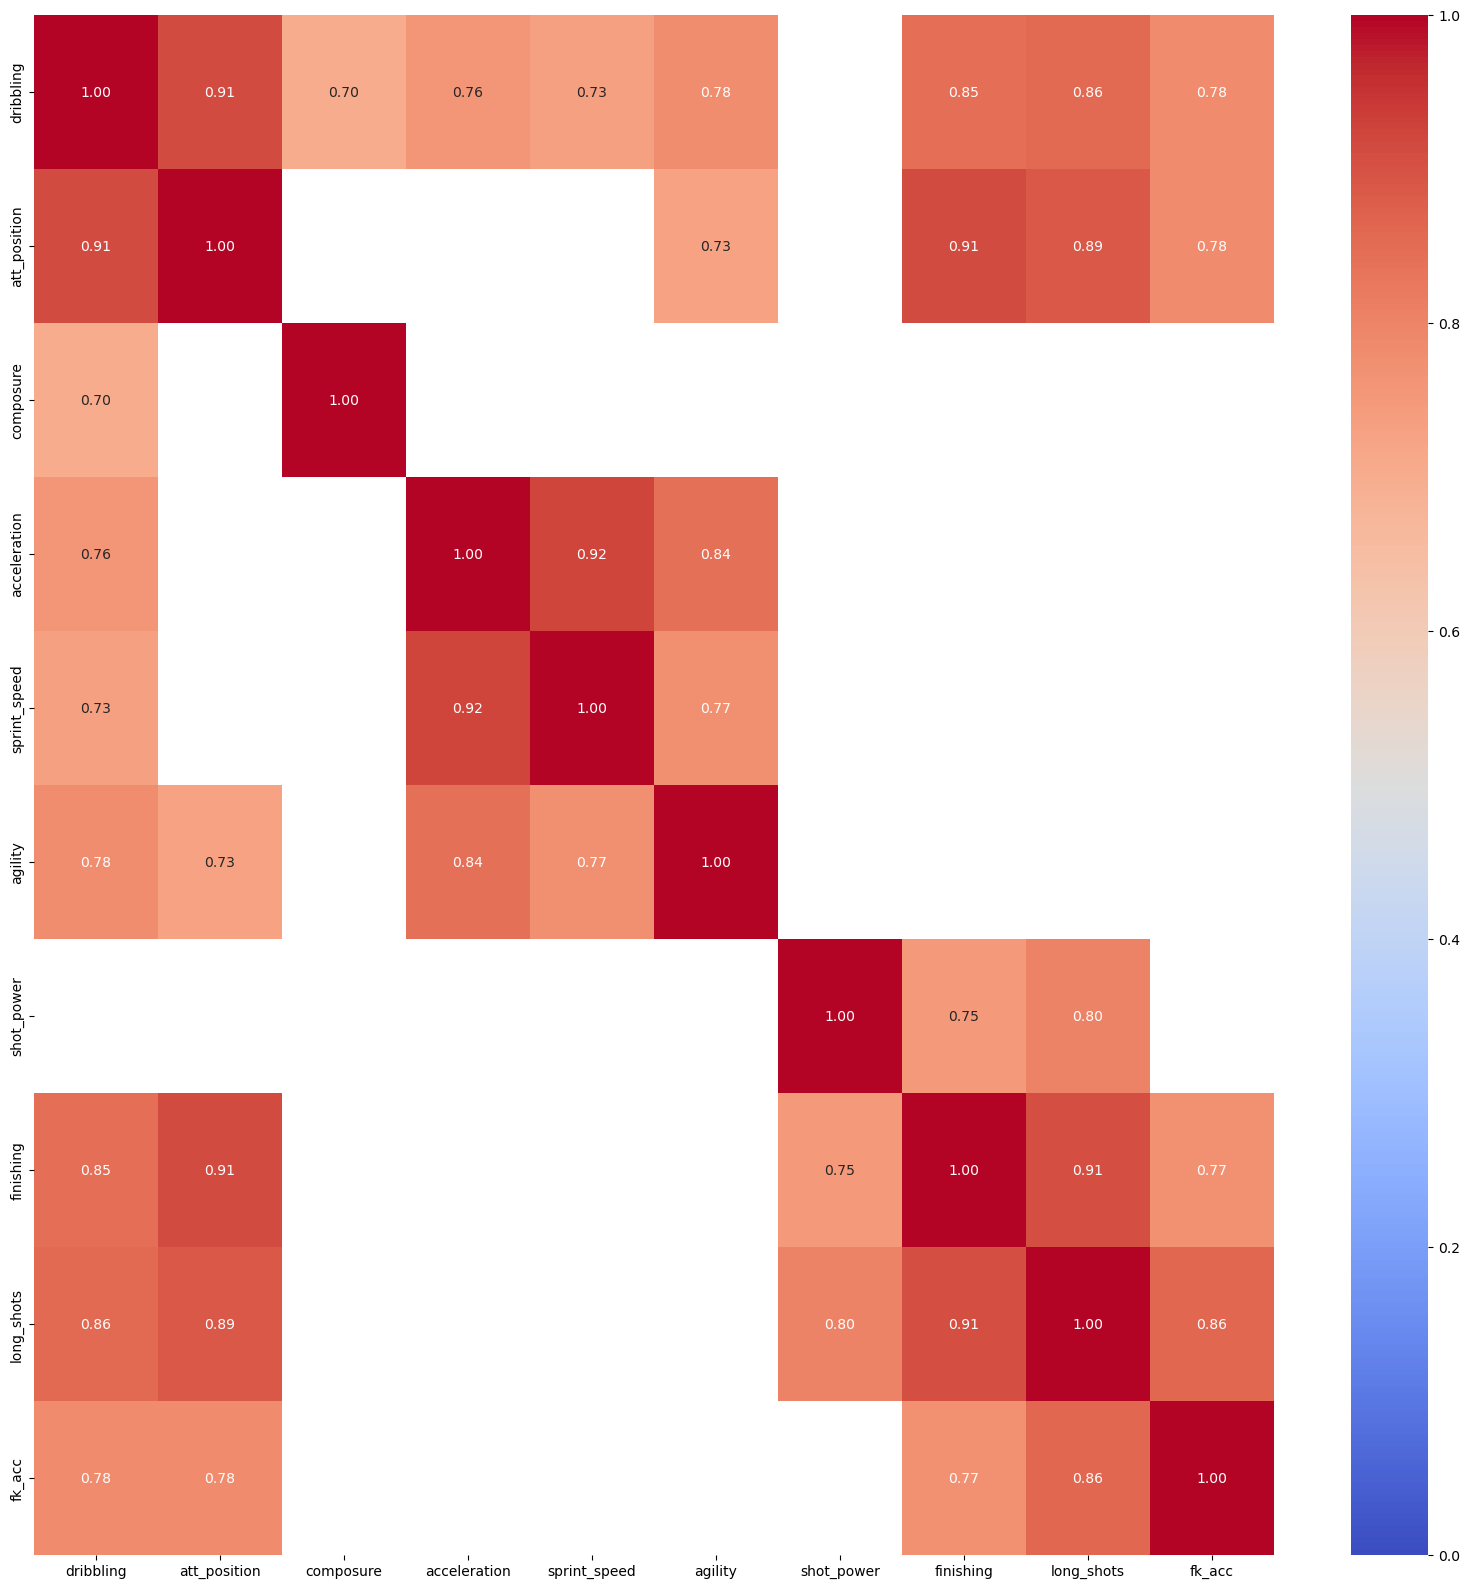

In [45]:
corr_mat_att = attacker.select_dtypes(include = "number").corr()
mask_att = corr_mat_att < 0.7
fig, ax = plt.subplots(figsize = (20, 20))
sn.heatmap(
    corr_mat_att,
    mask = mask_att, 
    cmap = "coolwarm", 
    annot=True,
    fmt=".2f",
    vmin=0.0,
    vmax=1.0,
    ax=ax)

#### Ermittlung des besten Spielers aus der Stürmer Gruppe

In [47]:
#Sum
sum_att = attacker.select_dtypes(include = "number").sum(axis=1)
attacker["sum_att"] = sum_att
attacker

,player,dribbling,att_position,composure,acceleration,sprint_speed,agility,shot_power,finishing,long_shots,fk_acc,sum_att
0,Cristian Castro Devenish,43,30,50,41,52,43,54,30,31,34,408
1,Silaldo Taffarel,70,69,54,64,67,65,60,64,68,62,643
2,Thomas Dähne,12,17,48,46,48,36,51,14,20,15,307
3,Michael Sollbauer,48,48,70,35,63,57,32,24,33,13,423
4,Diego Segovia,8,10,34,38,31,34,48,4,6,10,223
...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,88,91,90,89,89,89,82,92,84,69,863
5678,Sadio Mané,88,90,84,91,86,93,83,85,78,64,842
5679,Neymar Jr,95,86,93,88,86,93,79,83,81,87,871
5680,Cristiano Ronaldo,81,93,94,76,82,77,93,91,88,75,850


In [48]:
max_sum_att = attacker["sum_att"].max()

In [49]:
attacker = attacker[attacker["sum_att"] == max_sum_att]
attacker

,player,dribbling,att_position,composure,acceleration,sprint_speed,agility,shot_power,finishing,long_shots,fk_acc,sum_att
3555,Lionel Messi,95,93,96,87,76,91,86,90,91,93,898


**Lionel Messi** ist der Beste aus dieser Kategorie (Stürmer) und wird dann als außergewöhnlicher Spieler betrachtet.

#### Korrelationsanalyse von der Mittelfeld-Spieler Gruppe

In [52]:
miedfeld = player_data_cleaned_reduced.loc[:,["player", "ball_control", "dribbling", "att_position", "vision", "composure", "crossing", "short_pass", "long_pass", "agility", "shot_power", "finishing", "long_shots", "curve", "fk_acc"]]
miedfeld

,player,ball_control,dribbling,att_position,vision,composure,crossing,short_pass,long_pass,agility,shot_power,finishing,long_shots,curve,fk_acc
0,Cristian Castro Devenish,55,43,30,30,50,33,64,49,43,54,30,31,32,34
1,Silaldo Taffarel,69,70,69,64,54,60,63,63,65,60,64,68,65,62
2,Thomas Dähne,25,12,17,49,48,14,35,18,36,51,14,20,20,15
3,Michael Sollbauer,46,48,48,29,70,44,58,53,57,32,24,33,25,13
4,Diego Segovia,14,8,10,38,34,11,23,20,34,48,4,6,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,86,88,91,84,90,80,84,77,89,82,92,84,84,69
5678,Sadio Mané,86,88,90,84,84,78,84,71,93,83,85,78,77,64
5679,Neymar Jr,94,95,86,90,93,83,85,81,93,79,83,81,88,87
5680,Cristiano Ronaldo,87,81,93,76,94,78,78,70,77,93,91,88,79,75


<Axes: >

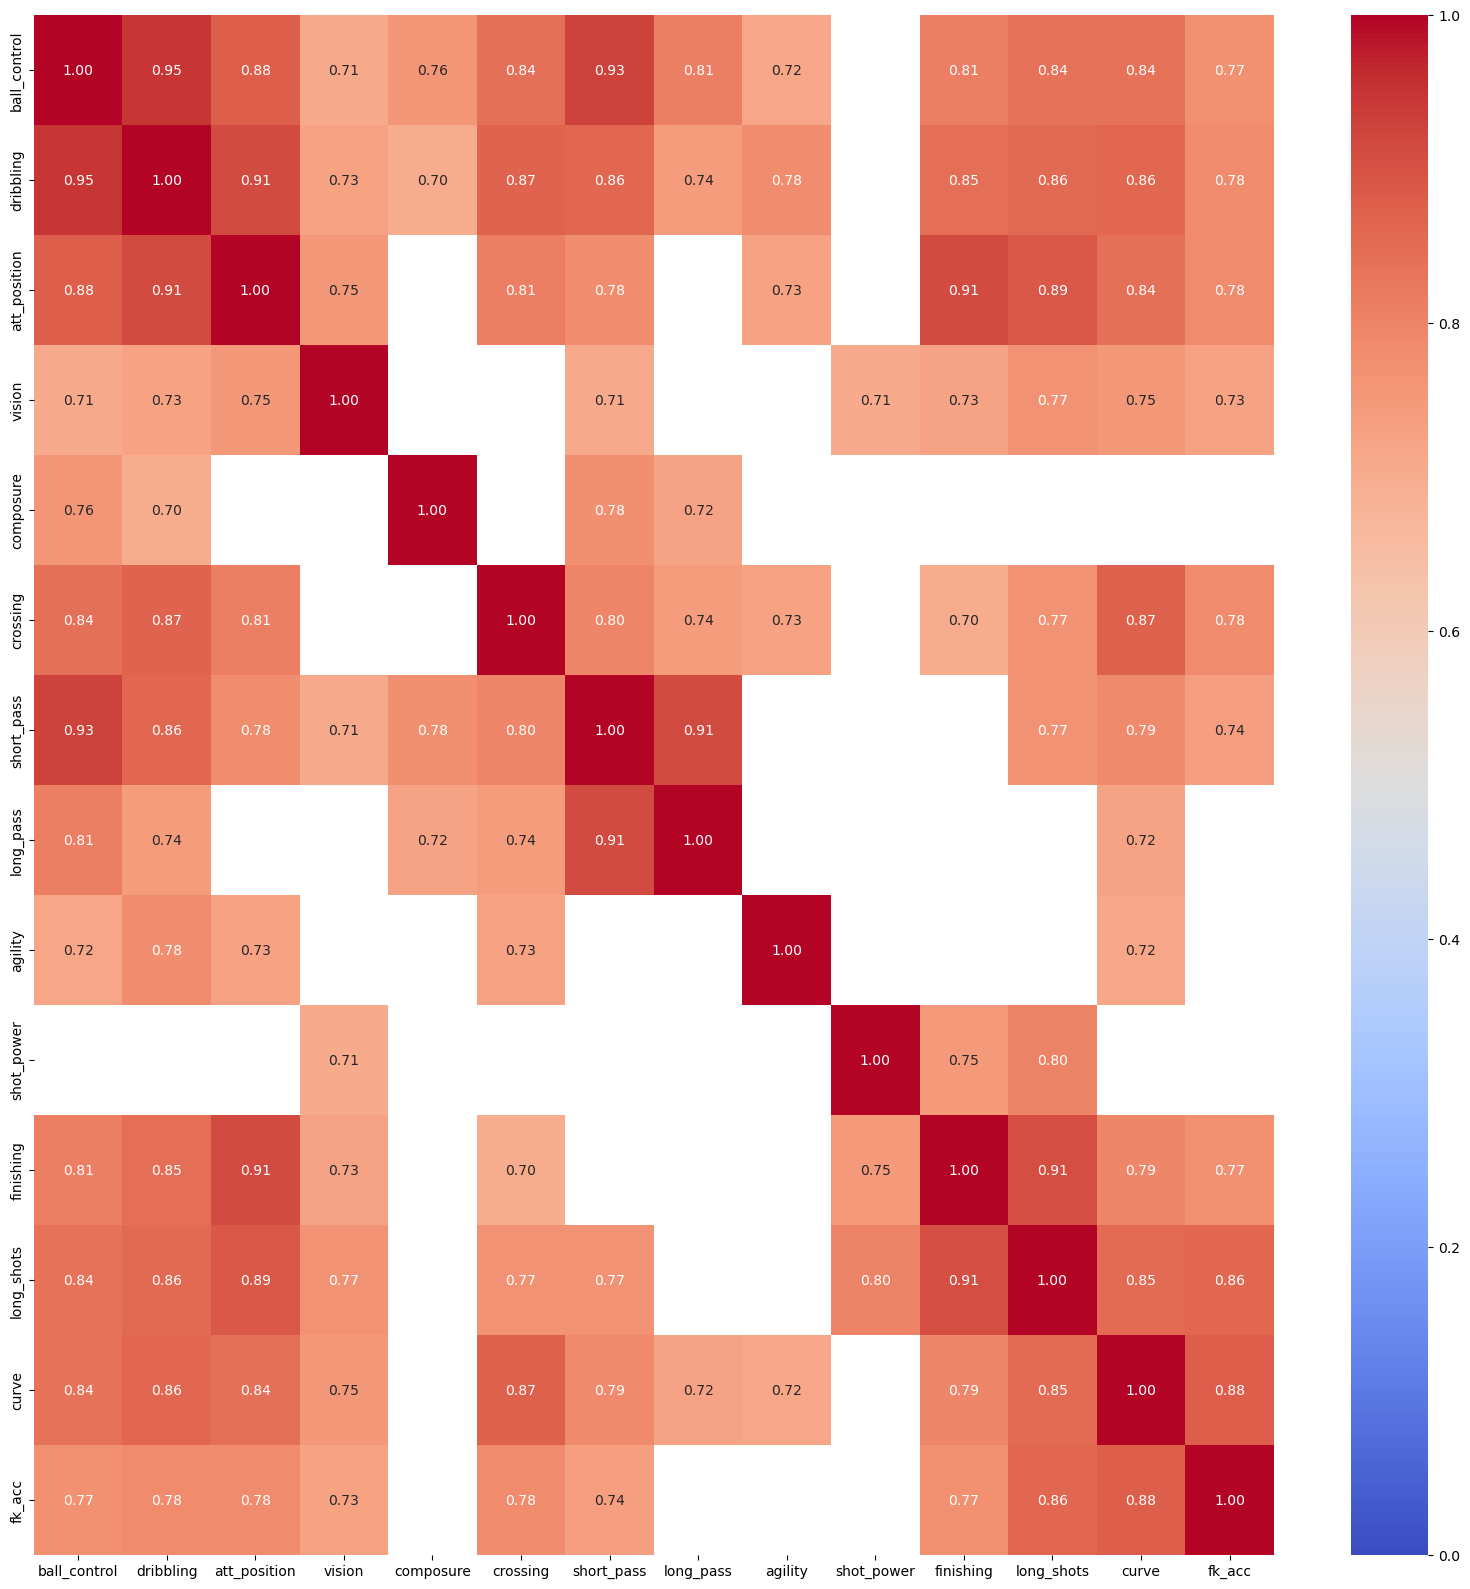

In [53]:
corr_mat_mied = miedfeld.select_dtypes(include = "number").corr()
mask_mied = corr_mat_mied < 0.7
fig, ax = plt.subplots(figsize = (20, 20))
sn.heatmap(
    corr_mat_mied,
    mask = mask_mied, 
    cmap = "coolwarm", 
    annot=True,
    fmt=".2f",
    vmin=0.0,
    vmax=1.0,
    ax=ax)

#### Ermittlung des besten Spielers aus der Mittelfeld-Spieler Gruppe

In [55]:
#Sum
sum_mied = miedfeld.select_dtypes(include = "number").sum(axis=1)
miedfeld["sum_mied"] = sum_mied
miedfeld

,player,ball_control,dribbling,att_position,vision,composure,crossing,short_pass,long_pass,agility,shot_power,finishing,long_shots,curve,fk_acc,sum_mied
0,Cristian Castro Devenish,55,43,30,30,50,33,64,49,43,54,30,31,32,34,578
1,Silaldo Taffarel,69,70,69,64,54,60,63,63,65,60,64,68,65,62,896
2,Thomas Dähne,25,12,17,49,48,14,35,18,36,51,14,20,20,15,374
3,Michael Sollbauer,46,48,48,29,70,44,58,53,57,32,24,33,25,13,580
4,Diego Segovia,14,8,10,38,34,11,23,20,34,48,4,6,9,10,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,86,88,91,84,90,80,84,77,89,82,92,84,84,69,1180
5678,Sadio Mané,86,88,90,84,84,78,84,71,93,83,85,78,77,64,1145
5679,Neymar Jr,94,95,86,90,93,83,85,81,93,79,83,81,88,87,1218
5680,Cristiano Ronaldo,87,81,93,76,94,78,78,70,77,93,91,88,79,75,1160


In [56]:
max_sum_mied = miedfeld["sum_mied"].max()

In [57]:
miedfeld_max = miedfeld[miedfeld["sum_mied"] == max_sum_mied]
miedfeld_max

,player,ball_control,dribbling,att_position,vision,composure,crossing,short_pass,long_pass,agility,shot_power,finishing,long_shots,curve,fk_acc,sum_mied
3555,Lionel Messi,93,95,93,94,96,84,91,90,91,86,90,91,93,93,1280


**Lionel Messi** ist auch der Beste aus dieser Kategorie (Mittelfeld Spieler) und wird dann als außergewöhnlicher Spieler betrachtet.

#### Korrelationsanalyse von der Verteidiger-Gruppe

In [60]:
defender = player_data_cleaned_reduced.loc[:, ["player", "slide_tackle", "stand_tackle", "aggression", "interceptions", "strength", "heading", "reactions", "composure"]]
defender

,player,slide_tackle,stand_tackle,aggression,interceptions,strength,heading,reactions,composure
0,Cristian Castro Devenish,68,73,72,65,86,64,68,50
1,Silaldo Taffarel,56,58,62,70,81,54,70,54
2,Thomas Dähne,13,16,27,20,68,17,65,48
3,Michael Sollbauer,66,69,71,66,82,67,64,70
4,Diego Segovia,14,16,28,12,64,13,50,34
...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,41,43,63,55,76,59,92,90
5678,Sadio Mané,38,42,75,35,72,84,91,84
5679,Neymar Jr,29,32,63,37,52,63,88,93
5680,Cristiano Ronaldo,24,32,62,29,75,89,90,94


<Axes: >

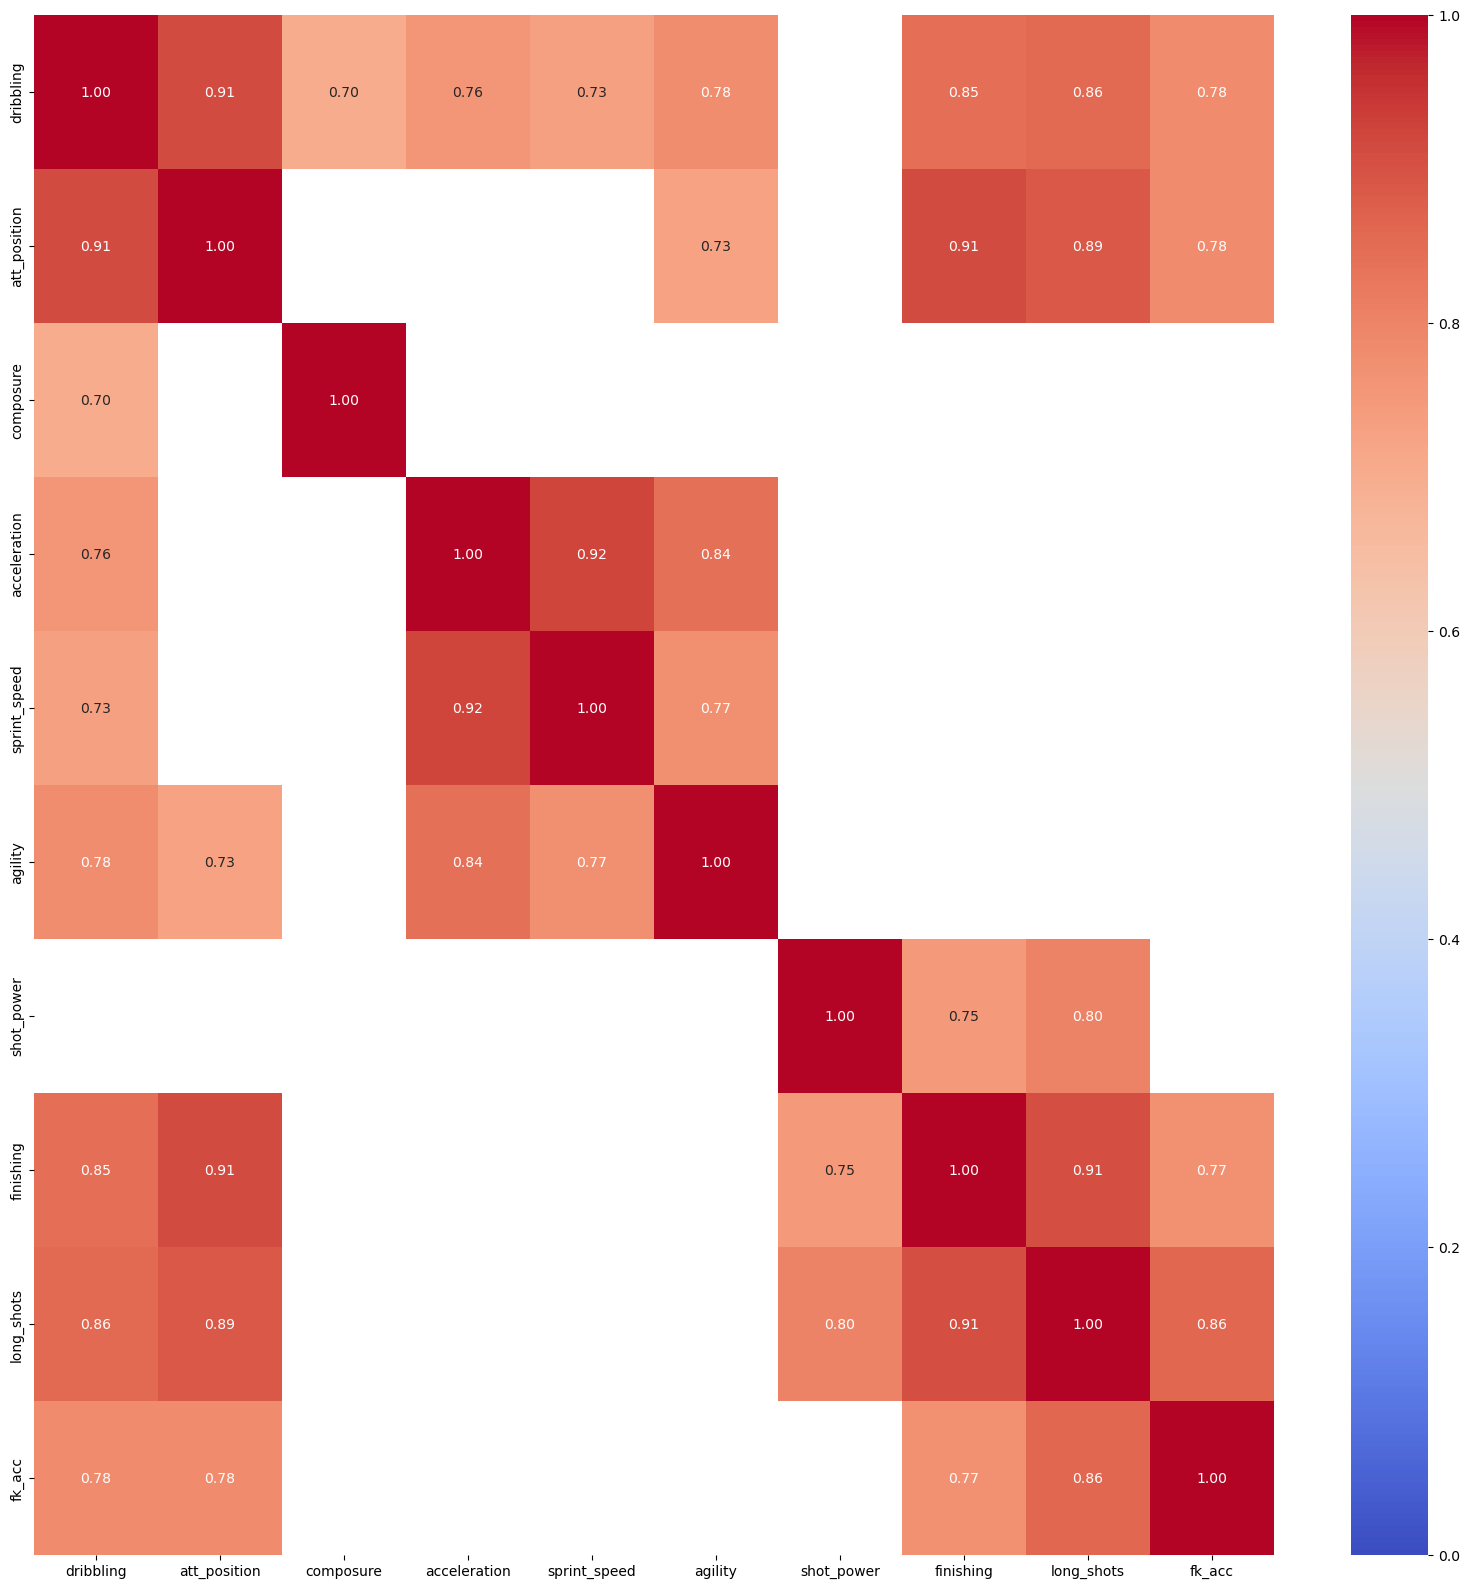

In [61]:
corr_mat_def = defender.select_dtypes(include = "number").corr()
mask_def = corr_mat_def < 0.7
fig, ax = plt.subplots(figsize = (20, 20))
sn.heatmap(
    corr_mat_att,
    mask = mask_att, 
    cmap = "coolwarm", 
    annot=True,
    fmt=".2f",
    vmin=0.0,
    vmax=1.0,
    ax=ax)

#### Ermittlung des besten Spielers aus der Verteidiger-Gruppe

In [63]:
#Sum
sum_def = defender.select_dtypes(include = "number").sum(axis=1)
defender["sum_def"] = sum_def
defender

,player,slide_tackle,stand_tackle,aggression,interceptions,strength,heading,reactions,composure,sum_def
0,Cristian Castro Devenish,68,73,72,65,86,64,68,50,546
1,Silaldo Taffarel,56,58,62,70,81,54,70,54,505
2,Thomas Dähne,13,16,27,20,68,17,65,48,274
3,Michael Sollbauer,66,69,71,66,82,67,64,70,555
4,Diego Segovia,14,16,28,12,64,13,50,34,231
...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,41,43,63,55,76,59,92,90,519
5678,Sadio Mané,38,42,75,35,72,84,91,84,521
5679,Neymar Jr,29,32,63,37,52,63,88,93,457
5680,Cristiano Ronaldo,24,32,62,29,75,89,90,94,495


In [64]:
max_sum_def = defender["sum_def"].max()

In [65]:
defender_max = defender[defender["sum_def"] == max_sum_def]
defender_max

,player,slide_tackle,stand_tackle,aggression,interceptions,strength,heading,reactions,composure,sum_def
4211,Virgil van Dijk,86,91,85,89,93,86,89,90,709


**Virgil Van Dijk** ist der Beste aus dieser Kategorie (Verteidiger) und wird als außergewöhnlicher Spieler betrachtet.

#### Korrelationsanalyse von der Torwart-Spieler Gruppe

In [68]:
goalkeeper = player_data_cleaned_reduced.loc[:, ["player", "gk_positioning", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "reactions", "composure", "jumping"]]
goalkeeper

,player,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,reactions,composure,jumping
0,Cristian Castro Devenish,10,11,6,7,9,68,50,51
1,Silaldo Taffarel,12,15,14,8,14,70,54,65
2,Thomas Dähne,64,74,65,68,74,65,48,60
3,Michael Sollbauer,10,10,8,14,9,64,70,80
4,Diego Segovia,61,59,62,64,64,50,34,27
...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,11,14,14,9,14,92,90,69
5678,Sadio Mané,7,10,10,15,14,91,84,87
5679,Neymar Jr,15,9,9,15,11,88,93,62
5680,Cristiano Ronaldo,14,7,11,15,11,90,94,95


#### Ermittlung des besten Spielers aus der Torwart-Spieler Gruppe

In [70]:
#Sum
sum_goal = goalkeeper.select_dtypes(include = "number").sum(axis=1)
goalkeeper["sum_goalkeeper"] = sum_goal
goalkeeper

,player,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,reactions,composure,jumping,sum_goalkeeper
0,Cristian Castro Devenish,10,11,6,7,9,68,50,51,212
1,Silaldo Taffarel,12,15,14,8,14,70,54,65,252
2,Thomas Dähne,64,74,65,68,74,65,48,60,518
3,Michael Sollbauer,10,10,8,14,9,64,70,80,265
4,Diego Segovia,61,59,62,64,64,50,34,27,421
...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,11,14,14,9,14,92,90,69,313
5678,Sadio Mané,7,10,10,15,14,91,84,87,318
5679,Neymar Jr,15,9,9,15,11,88,93,62,302
5680,Cristiano Ronaldo,14,7,11,15,11,90,94,95,337


In [71]:
max_sum_goalkeeper = goalkeeper["sum_goalkeeper"].max()

In [72]:
goalkeeper_max = goalkeeper[goalkeeper["sum_goalkeeper"] == max_sum_goalkeeper]
goalkeeper_max

,player,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,reactions,composure,jumping,sum_goalkeeper
2458,Gianluigi Donnarumma,85,90,83,79,89,85,65,72,648


**Gianluigi Donnarumma** ist der beste aus dieser Kategorie (Torwart) und wird dann als außergewöhnlicher Spieler betrachtet.

### Ergebnis
**Lionel Messi**, **Virgil Van Dijk** und **Gianluigi Donnarumma** sind dann basierend auf ihren Statistiken die außergewöhnlichen Spieler.